**Read the data and plot the ACF**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import numpy as np
df = pd.read_csv('/content/australia_temp_data.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


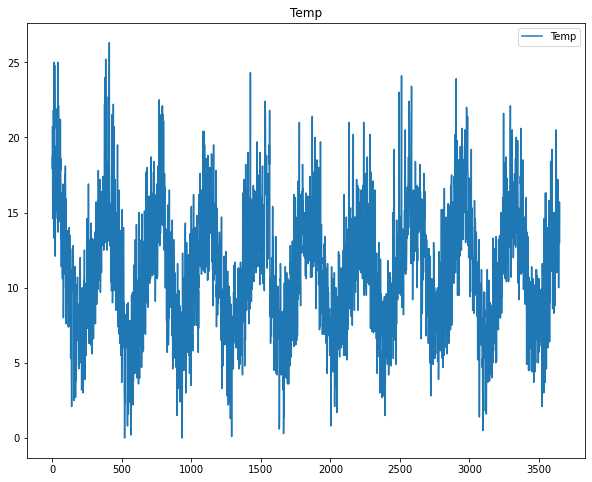

In [2]:
from matplotlib import pyplot
df.plot(figsize=(10,8))
pyplot.title("Temp")
pyplot.show()

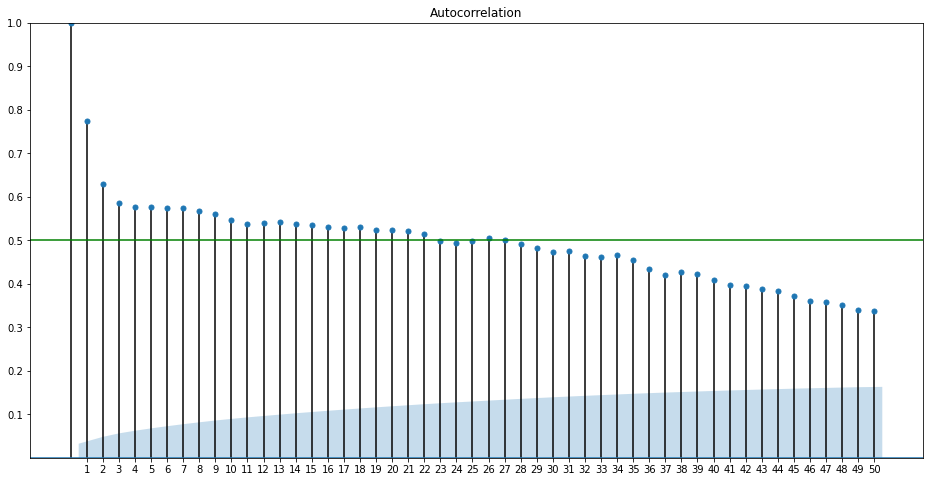

In [3]:
fig, ax = plt.subplots(figsize=(16,8))
plot_acf(df['Temp'], lags=50, ax=ax)
plt.ylim([0,1])
plt.yticks(np.arange(0.1, 1.1, 0.1))
plt.xticks(np.arange(1, 51, 1))
plt.axhline(y=0.5, color="green")
plt.show()

**Splitting the data into training and test data sets**

In [4]:
df_train = df['Temp'].iloc[:-5]
df_test = df['Temp'].iloc[-5:]

**Creating and fitting the model**

In [5]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(df_train, lags=22).fit()

**Forecasting and evaluation**

In [7]:
forecasts = model.forecast(5).tolist()
test_values = df_test.tolist()
for index in range(len(forecasts)):
  difference = forecasts[index] - test_values[index]
  print(forecasts[index], test_values[index], difference)

14.454713753476343 14.0 0.4547137534763426
13.79523914849815 13.6 0.19523914849814972
13.439249978365861 13.5 -0.06075002163413856
13.323261111336475 15.7 -2.3767388886635246
13.111045598879578 13.0 0.11104559887957777


In [8]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(test_values, forecasts))

1.181958471550285


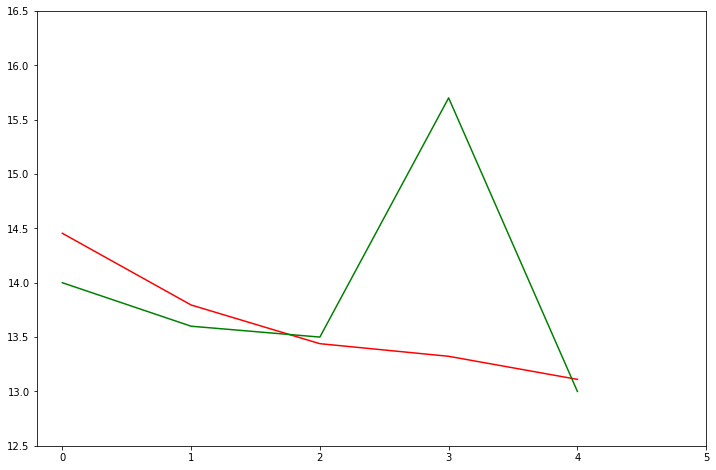

In [9]:
fig = plt.subplots(figsize=(12,8))
plt.plot(forecasts, color="red")
plt.plot(test_values,color="green")
plt.xticks(np.arange(0,6,1))
plt.yticks(np.arange(12.5, 17, 0.5))
plt.show()